In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import zipfile

os.chdir('/home/lenovo/data_files')

In [2]:
zf = zipfile.ZipFile('suicide_rate.zip') 
data = pd.read_csv(zf.open('master.csv'))


In [3]:
data.head(265)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
data.isnull().any()


country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [7]:
print("#INFERENCE: Russia is on the top of the list, USA is at 2nd posn and Japan stands at third.")

freq_dist = data.groupby(['country'])['suicides_no'].agg('sum')
print(freq_dist.sort_values(ascending=False))


#INFERENCE: Russia is on the top of the list, USA is at 2nd posn and Japan stands at third.
country
Russian Federation              1209742
United States                   1034013
Japan                            806902
France                           329127
Ukraine                          319950
Germany                          291262
Republic of Korea                261730
Brazil                           226613
Poland                           139098
United Kingdom                   136805
Italy                            132060
Mexico                           111139
Thailand                         110643
Canada                           107561
Kazakhstan                       101546
Spain                            100202
Argentina                         82219
Hungary                           73891
Romania                           72777
Australia                         70111
Belgium                           62761
Belarus                           59892
Sri Lanka           

Top 10 countries that are suffered from suicidal attacks..


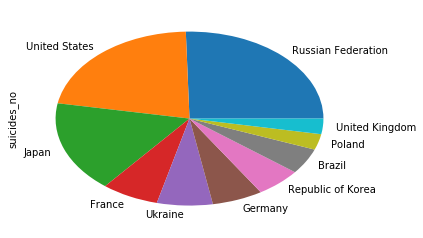

In [8]:
pie_data = data.groupby(['country'])['suicides_no'].agg('sum')
sorted_pie_data = pie_data.sort_values(ascending=False)
sorted_pie_data[:10].plot.pie()
print("Top 10 countries that are suffered from suicidal attacks..")

year 1999 has maximum number of suicidal cases, whereas 2016 has minimum no of suicidal cases accrording to overall world data.


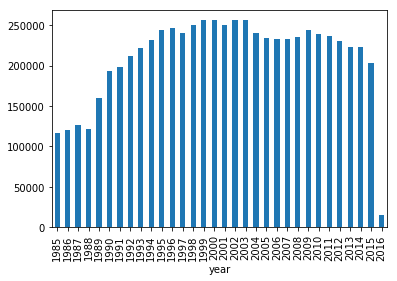

In [9]:
scatter_data = data.groupby(['year'])['suicides_no'].agg('sum')
scatter_data.plot.bar()
print("year 1999 has maximum number of suicidal cases, whereas 2016 has minimum no of suicidal cases accrording to overall world data.")

Top 20 years having maximum no. of suicidal cases..


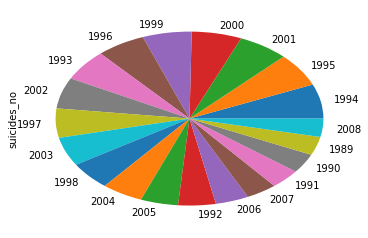

In [10]:
scatter_data = data.groupby(['year'])['suicides_no'].agg('max')
sorted_data = scatter_data.sort_values(ascending=False)
sorted_data[:20].plot.pie()
print("Top 20 years having maximum no. of suicidal cases..")

INFERENCE: Boomers generation is more involved in suicidal cases, whereas Generation Z is least involved


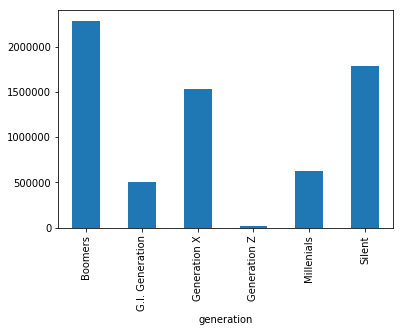

In [11]:
temp_data = data.groupby(['generation'])['suicides_no'].agg('sum')

temp_data.plot.bar()

print("INFERENCE: Boomers generation is more involved in suicidal cases, whereas Generation Z is least involved")


Relation between total suicide cases and population of various countries


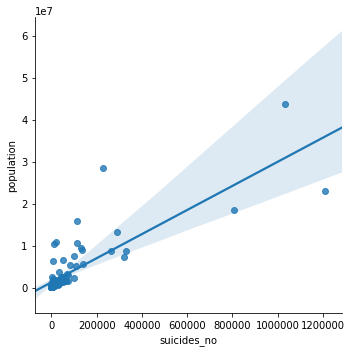

In [12]:
temp_data = data.groupby('country', as_index=False).agg({"suicides_no": "sum", "population": "max"})
sns.lmplot(x='suicides_no', y='population', data=temp_data)
print("Relation between total suicide cases and population of various countries")

# Let's explore USA datasets more closely

In [13]:
usa_data = data.ix[(data['country']=="United States")]
usa_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
26853,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,"4,346,734,000,000",19693,Silent
26854,United States,1985,female,55-74 years,1568,21366000,7.34,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26855,United States,1985,female,75+ years,466,7469000,6.24,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26856,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26857,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [14]:
print("Number of suicides in USA till year 2016 is :" , sum(usa_data["suicides_no"]))

Number of suicides in USA till year 2016 is : 1034013


#INFERENCE: Suicidal cases in USA increases from the year 2004


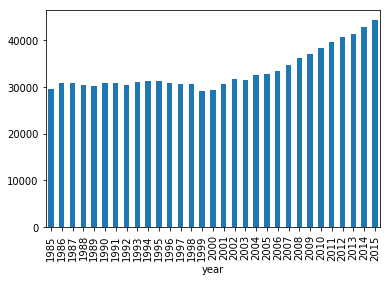

In [15]:
scatter_data = usa_data.groupby(['year'])['suicides_no'].agg('sum')
scatter_data.plot.bar()
print("#INFERENCE: Suicidal cases in USA increases from the year 2004") 

#INFERENCE: This bar plot has a lot to tell !
1. No of males in all age groups are more than that of females.
2. In both male and female category, the most suffered age group is 35-54 years.
3. Childrens below 14 years are happy with their life. But still there are some cases where childrens under 14 years old attempt a suicide.


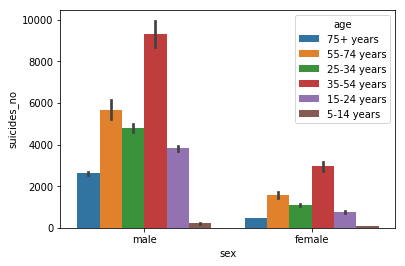

In [16]:
sns.barplot(usa_data["sex"] , usa_data["suicides_no"] , estimator=np.mean , hue=usa_data['age'])

print("#INFERENCE: This bar plot has a lot to tell !")
print("1. No of males in all age groups are more than that of females.")
print("2. In both male and female category, the most suffered age group is 35-54 years.")
print("3. Childrens below 14 years are happy with their life. But still there are some cases where childrens under 14 years old attempt a suicide.")

#INFERENCE: This heatmap shows that there is a genration shift between the year 2001-2006. Before 2001, Generation Z has most no of cases, but after 2006, most cases belongs to GI Generation.


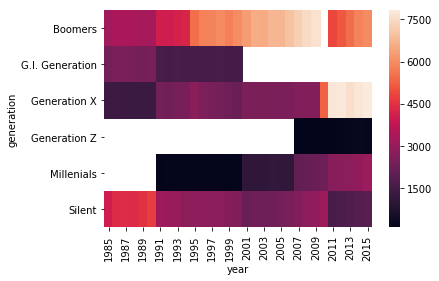

In [17]:
pt = usa_data.pivot_table(values="suicides_no" , index="generation", columns="year")
sns.heatmap(pt)
temp_data = data.groupby('country', as_index=False).agg({"suicides_no": "sum", "population": "max"})

print("#INFERENCE: This heatmap shows that there is a genration shift between the year 2001-2006. Before 2001, Generation Z has most no of cases, but after 2006, most cases belongs to GI Generation.")  

This figure shows linear regression line between population and suicides


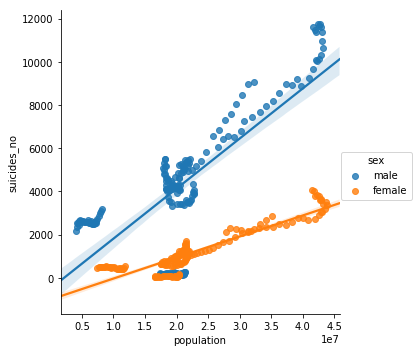

In [18]:
sns.lmplot(x='population' , y='suicides_no' , data=usa_data , hue="sex")

print("This figure shows linear regression line between population and suicides")

INFERENCE: On increasing gdp , male suicide cases increases but it does not have much effect on females.


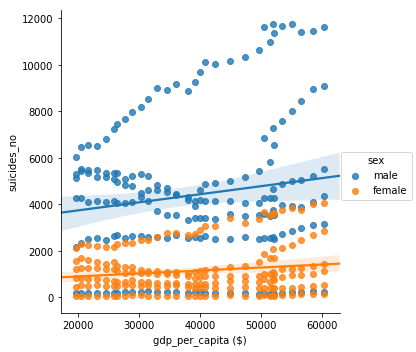

In [19]:
sns.lmplot(x='gdp_per_capita ($)' , y='suicides_no' , data=usa_data , hue="sex")

print("INFERENCE: On increasing gdp , male suicide cases increases but it does not have much effect on females.")

The most suffered age group in USA is 35-54 years, whereas least suffered is 5-14 years .


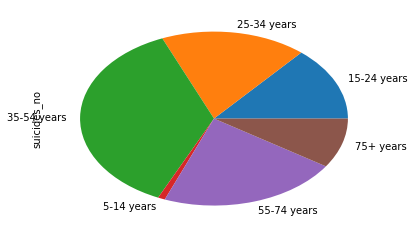

In [20]:
pie_data = usa_data.groupby(['age'])['suicides_no'].agg('sum')
pie_data.plot.pie()
print("The most suffered age group in USA is 35-54 years, whereas least suffered is 5-14 years .")


In [21]:
temp_data = data.groupby('year', as_index=False).agg({"suicides_no": "sum", "population": "max"})

print("Yearwise suicides and population in USA ")
print()
print(temp_data)

Yearwise suicides and population in USA 

    year  suicides_no  population
0   1985       116063    27763000
1   1986       120670    28520000
2   1987       126842    29359000
3   1988       121026    30281000
4   1989       160244    31264000
5   1990       193361    31749500
6   1991       198020    33017000
7   1992       211473    34156600
8   1993       221565    35236400
9   1994       232063    36290200
10  1995       243544    37303100
11  1996       246725    38357900
12  1997       240745    39291000
13  1998       249591    40104100
14  1999       256119    40861603
15  2000       255832    41881451
16  2001       250652    42567863
17  2002       256095    42957716
18  2003       256079    42997878
19  2004       240861    43240905
20  2005       234375    43509335
21  2006       233361    43805214
22  2007       233408    43607902
23  2008       235447    43002471
24  2009       243487    42932194
25  2010       238702    42798501
26  2011       236484    42566273
27  20